In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

path = '../dataset/'

# 데이터 불러오기

In [5]:
# CSV 파일로 불러오기
data = pd.read_csv(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [6]:
# excel 파일로 불러오기
data = pd.read_excel(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.xlsx')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [26]:
# 데이터의 컬럼 명칭을 리스트로 전환
col_list = data.columns.tolist()[4:]

# 리스트로 전환한 컬럼의 홀수번은 발생이며, 짝수번은 검거임.
# 따라서, 5대 범죄의 검거율 데이터를 형성하기 위해서는 홀수번째 컬럼 / 짝수번째 컬럼으로 계산하면 됨.
crime_5 = ['살인 검거율', '강도 검거율', '강간 검거율', '절도 검거율', '폭력 검거율'] 
for i in range(5):
    data[crime_5[i]] = round(data[col_list[i * 2 + 1]] / data[col_list[i * 2]] * 100, 1)

# 데이터가 잘 입력되었는지 확인하는 부분
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,살인 검거율,강도 검거율,강간 검거율,절도 검거율,폭력 검거율
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745,95.5,104.0,94.3,67.5,91.7
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227,96.0,100.0,95.1,70.9,90.9
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263,100.0,96.3,94.3,69.1,90.3
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841,103.6,103.6,94.5,69.1,90.7
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670,93.9,100.0,94.3,62.7,88.2
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377,96.0,98.2,96.2,48.2,87.1


# 1. 모수에 대한 가설 검정

## A. 모평균에 대한 가설검정

In [7]:
# 정규분포 그리는 함수 (week_5 distribution 파일에 포함)
def normal_df(N, sigma, mu):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    import seaborn as sns

    np.random.seed(0)
    x = sp.stats.norm(mu, sigma).rvs(N)

    # 시각화하는 부분은 주석처리하여 따로 출력하지 않고, 대신 데이터의 형성 후 return 해줌.
    # ax = sns.distplot(x, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x.std(),3)})")
    # plt.legend(bbox_to_anchor=(1.0, .2))
    # plt.show()

    return x

In [20]:
def t_test(x1, x2, sig_level = 0.05):
    from scipy.stats import ttest_ind

    print(f't-test 검정통계치 : {ttest_ind(x1, x2)[0]}')
    print(f't-test p-value : {round(ttest_ind(x1, x2)[1], 3)}')
    
    # t-test로 도출한 p값을 기존에 설정한 유의수준과 비교하여 귀무가설을 기각할 수 있는지 여부를 표시해줌.
    if ttest_ind(x1,x2)[1] < sig_level:
        print(f't-test 결과, {sig_level*100}%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 있습니다.')
    else:
        print(f't-test 결과, {sig_level*100}%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 없습니다.')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


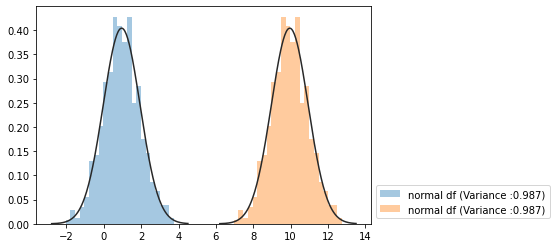

t-test 검정통계치 : -203.78795583613376
t-test p-value : 0.0
t-test 결과, 5.0%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 있습니다.


In [10]:
# 정규분포의 특성을 가지는 임의의 데이터 2개 형성
x1 = normal_df(1000, 1, 1)  # 평균 1, 표준편차 1
x2 = normal_df(1000, 1, 10) # 평균 10, 표준편차 1

# 시각화
sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

# t-test 진행
t_test(x1, x2, 0.05)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


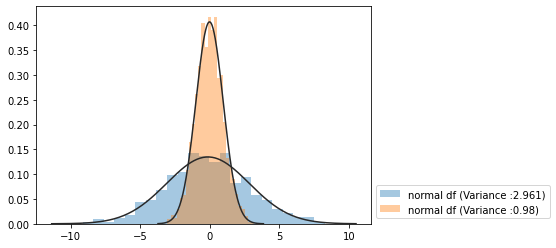

t-test 검정통계치 : -1.3973555186452973
t-test p-value : 0.162
t-test 결과, 5.0%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 없습니다.


In [11]:
# 표준정규분포 형성 (평균이 동일하지만, 표준편차와 데이터 개수가 다른 데이터 형성)
x1 = normal_df(1000, 3, 0) # (평균 = 0, 표준편차 = 3)
x2 = normal_df(1500, 1, 0) # (평균 = 0, 표준편차 = 1)

# 시각화
sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

t_test(x1, x2, 0.05)

## B. 모비율에 대한 가설검정

In [28]:
# 강원도 경찰청 5대 범죄 데이터로 진행해봅니다.

# 모비율 데이터를 형성하기 위해 새로운 리스트 형성
arrest_1 = []
arrest_2 = []

# for 문을 활용하여 범죄 발생, 검거 데이터를 리스트에 append하는 작업
for i, j in zip(range(2), [arrest_1,arrest_2]):
    j.append(data['발생'].tolist()[i])
    j.append(data['검거'].tolist()[i])

# 잘 입력되었는지 확인해보는 부분
print(arrest_1, arrest_2)

[13859, 11597] [14094, 11980]


arrest_1 : 발생 = 13859, 검거 = 11597, 검거율 = 83.7%
arrest_2 : 발생 = 14094, 검거 = 11980, 검거율 = 85.0%


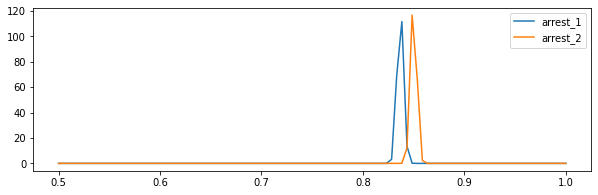

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm
 
print(f'arrest_1 : 발생 = {arrest_1[0]}, 검거 = {arrest_1[1]}, 검거율 = {round(arrest_1[1]/arrest_1[0], 3) * 100}%')
print(f'arrest_2 : 발생 = {arrest_2[0]}, 검거 = {arrest_2[1]}, 검거율 = {round(arrest_2[1]/arrest_2[0], 3) * 100}%')
 
# plot으로 그리기 위해 x축 데이터 형성
x = np.linspace(0.5, 1, 100)
 
# arrest_1 데이터에 대한 정보
n = arrest_1[0]
p = arrest_1[1]/arrest_1[0]
std = np.sqrt(p*(1-p)/n)    
y_a = norm.pdf(x, p, std) # 확률 누적 분포로 데이터 형성
 
# arrest_2 데이터에 대한 정보
n = arrest_2[0]
p = arrest_2[1]/arrest_2[0]
std = np.sqrt(p*(1-p)/n)
y_b = norm.pdf(x, p, std) # 확률 누적 분포로 데이터 형성

plt.figure(figsize=(10, 3))
plt.plot(x, y_a, label='arrest_1')
plt.plot(x, y_b, label='arrest_2')
plt.legend(loc='best')
plt.show()


In [30]:
def chi2(x1, x2, sig_level=0.05):
    from scipy.stats import chi2_contingency

    print(f'카이제곱 검정통계치 : {chi2_contingency([x1, x2])[0]}')
    print(f'카이제곱 P-value : {round(chi2_contingency([x1, x2])[1], 3)}')
    print(f'자유도 : {chi2_contingency([x1, x2])[2]}')
    
    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분
    if chi2_contingency([x1, x2])[1] < sig_level:
        print(f'카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
# arrest_1, 2 데이터에 대한 카이제곱 검정 시행
chi2(arrest_1,arrest_2, 0.05)

카이제곱 검정통계치 : 0.7701678869366818
카이제곱 P-value : 0.38
자유도 : 1
카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 없습니다.


## C. 모분산에 대한 가설검정

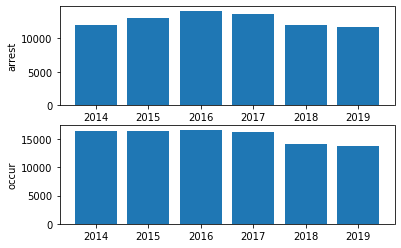

In [32]:
# 강원도 경찰청 5대 범죄 데이터로 진행해봅니다.

# 검거와 발생 데이터를 리스트 형태로 새롭게 지정함.
arrest = data['검거'].tolist()
occur = data['발생'].tolist()

# 데이터 보기
plt.subplot(2,1,1)
plt.bar(x = data['년도'], height = data['검거'])
plt.ylabel('arrest')
plt.subplot(2,1,2)
plt.bar(x = data['년도'], height = data['발생'])
plt.ylabel('occur')
plt.show()

In [33]:
def f_test(x1,x2,sig_level=0.05):
    # 라이브러리 호출
    from scipy.stats import f_oneway

    # 검정통계치. p값을 출력하는 부분 (소수점 3째 자리까지)
    print(f'F-test 검정통계치 : {round(f_oneway(x1, x2)[0], 3)}')
    print(f'F-test P-value : {round(f_oneway(x1, x2)[1], 3)}')

    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분    
    if f_oneway(x1, x2)[1] < sig_level:
        print(f'F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
f_test(arrest, occur, sig_level=0.05)

F-test 검정통계치 : 19.617
F-test P-value : 0.001
F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.


# 2. 표본에 대한 가설 검정

## A. 단일표본 t 검정 (1-sample T-test)

In [38]:
import numpy as np
from scipy.stats import ttest_1samp

# 정규분포 형성 함수를 이용하여 정규분포 데이터 형성 
x = normal_df(1000, 10, 1)  # 평균 10, 표준편차 1
test = 10
# 1-sample t-test 시행 (평균이 10이 맞는지)
result= ttest_1samp(x,test)

print(f'T 검정 검정통계량 : {result[0] : .4f}')
print(f'T 검정 p-value : {result[1] : .4f}')

if result[1] < 0.05:
    print(f'평균이 {test}이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
else:
    print(f'평균이 {test}이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

T 검정 검정통계량 : -30.2692
T 검정 p-value :  0.0000
평균이 10이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


## B. 독립 표본 t 검정 (Unpaired T-test)

### B-1 등분산일 경우 (T-test)

In [23]:
# 위의 모평균 차이 검정에서 진행한 것과 동일하므로 주석처리하였음

# # 정규분포의 특성을 가지는 임의의 데이터 2개 형성
# x1 = normal_df(1000, 1, 1)  # 평균 1, 표준편차 1
# x2 = normal_df(1000, 1, 10) # 평균 10, 표준편차 1

# # 시각화
# sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
# sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
# plt.legend(bbox_to_anchor=(1.0, .2))
# plt.show()

# # t-test 진행
# t_test(x1, x2, 0.05)

### B-2 이분산일 경우 (Welch's T-test)

In [49]:
# 위에서 등분산 검정에서 귀무가설 기각으로 이분산이 성립한 2개의 샘플에 대해서 이분산 t-test 진행
f_test(arrest, occur, sig_level=0.05)

F-test 검정통계치 : 19.617
F-test P-value : 0.001
F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.
arrset의 평균 : 12696.333333333334
occur의 평균 : 15624.333333333334


In [50]:
from scipy.stats import ttest_ind

result = ttest_ind(arrest, occur, equal_var=False)


print(f'T 검정 검정통계량 : {result[0] : .4f}')
print(f'T 검정 p-value : {result[1] : .4f}')

if result[1] < 0.05:
    print(f'평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
else:
    print(f'평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')
    
# 물론 실제로도 두 데이터의 평균은 다릅니다.
# print(f'arrset의 평균 : {np.mean(arrest)}')
# print(f'occur의 평균 : {np.mean(occur)}')

T 검정 검정통계량 : -4.4291
T 검정 p-value :  0.0015
평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


## C. 대응표본 t 검정 (Paired T-test)

In [20]:
# 대응표본 예시 데이터 (고혈압약을 투약한 경우, 어떤 유의한 변화가 나타나는지 대응표본 검정을 시행한다)
# csv file
data = pd.read_csv(path+'대응표본T검정예제.csv')
# excel file
data = pd.read_excel(path+'대응표본T검정예제.xlsx')

data

,before,after
0,168,104
1,152,145
2,154,135
3,160,116
4,149,112
5,166,112
6,147,140
7,176,114
8,155,145
9,177,133


In [21]:
def two_paired_test(x1, x2, sig_level=0.05):
    # 라이브러리 호출
    from scipy.stats import ttest_rel

    print(f'대응 2표본 검정통계치 : {round(ttest_rel(x1, x2)[0], 3)}')
    print(f'대응 2표본 P-value : {round(ttest_rel(x1, x2)[1], 3)}')
    
    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분    
    if ttest_rel(x1, x2)[1] < sig_level:
        print(f'대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
two_paired_test(data['before'], data['after'], 0.05)

대응 2표본 검정통계치 : 7.695
대응 2표본 P-value : 0.0
대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.
